In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# 3

def rk4(f, y0, T, N):
    # f(t_n, y_n) -> y'_n
    # y0 = Initial value
    # T = Final value of t, t varies from 0 to T inclusive
    # N = number of steps
    y = np.array(y0, dtype=float)
    h = float(T)/N
    ts = np.linspace(0, T, N+1)

    out = np.empty(shape=(N+1,y.shape[0]), dtype=float)

    for i, t in enumerate(ts[:-1]):
        out[i] = y
        k1 = f(t, y)
        k2 = f(t+0.5*h, y + 0.5*h*k1)
        k3 = f(t+0.5*h, y + 0.5*h*k2)
        k4 = f(t+h, y + h*k3)
        y += h* 1/6.0 * (k1 + k2+k2 + k3+k3 + k4)
    
    out[N] = y

    return out

In [3]:
def p3a():
    f = lambda t,y: y
    y0 = [1]
    T = 1

    return (np.e - rk4(f,y0,T,10)[10,0])/(np.e - rk4(f,y0,T,20)[20,0])

p3a()

15.34817589271767

In [4]:
def p3b():
    f = lambda t,y: y
    y0 = [1]
    T = 1

    for n in range(1,100):
        approx = rk4(f, y0, T, n)[n,0]
        if str(approx)[:7] == '2.71828':
            return f'Step size N = {n} returns y_N = {approx}'
        
p3b()

'Step size N = 11 returns y_N = 2.718280394036569'

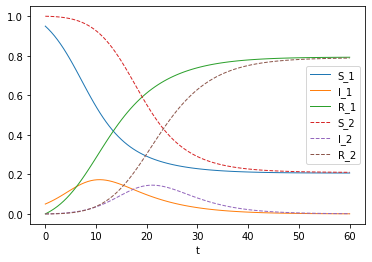

In [5]:
# 5c

T=60    # final simulation time
N=100   # Step count
h=T/N   # Step size

beta = 0.5         # S->I growth
gamma = 0.25       # I->R growth
rho1 = 0.01        # Group 1->2 growth
rho2 = 0.01        # Group 2->1 growth

Phi = np.zeros((N+1,6))    # Array for storing all step results
t = np.linspace(0,T,N+1)   # All t values

Phi[0]=np.array([.95,.05,0,1,0,0])    # Initial value
S1, I1, R1, S2, I2, R2 = Phi[0]       # ...

def f(t,Phi):                               # f(t,y) = y'
    S1, I1, R1, S2, I2, R2 = Phi                # Extract pre-step values
    f = np.zeros(6)                             # Output array
    f[0] = -beta*S1*I1-rho1*S1+rho2*S2          # New S1
    f[1] = beta*S1*I1-gamma*I1-rho1*I1+rho2*I2  # New I1
    f[2] = gamma*I1-rho1*R1+rho2*R2             # New R1
    f[3] = -beta*S2*I2-rho2*S2+rho1*S1          # New S2
    f[4] = beta*S2*I2-gamma*I2-rho2*I2+rho1*I1  # New I2
    f[5] = gamma*I2-rho2*R2+rho1*R1             # New R2
    return f                                    # Return new values

for j in np.arange(0,N):               # For each step
    k1 = f(t[j],Phi[j])                # Compute k1
    k2 = f(t[j]+h/2,Phi[j]+h/2*k1)     # Compute k2
    k3 = f(t[j]+h/2,Phi[j]+h/2*k2)     # Compute k3
    k4 = f(t[j]+h,Phi[j]+h*k3)         # Compute k4
    k = (k1+2*k2+2*k3+k4)/6            # Weighted average of ks
    Phi[j+1] = Phi[j] + h*k            # Perform the step



plt.figure()                            # Start a plot
plt.plot(t,Phi[:,0],'-',linewidth=1)    # Plot S1
plt.plot(t,Phi[:,1],'-',linewidth=1)    # Plot I1
plt.plot(t,Phi[:,2],'-',linewidth=1)    # Plot R1
plt.plot(t,Phi[:,3],'--',linewidth=1)   # Plot S2
plt.plot(t,Phi[:,4],'--',linewidth=1)   # Plot I2
plt.plot(t,Phi[:,5],'--',linewidth=1)   # Plot R2
plt.legend(['S_1','I_1','R_1','S_2','I_2','R_2'])  # Label each plot accordingly
plt.xlabel('t')                                    # Label x axis
plt.show()                                         # Finish and show the plot

In [6]:
beta = 0.5 # S->I growth
gamma = 0.25 # I->R growth
rho1 = 0.01 # Group 1->2 growth
rho2 = 0.01 # Group 2->1 growth

y0 = np.array([.95,.05,0,1,0,0])
T = 60

In [7]:
def p5d():
    N25 = rk4(f, y0, T, 25)[25,:]
    N50 = rk4(f, y0, T, 50)[50,:]
    N100 = rk4(f, y0, T, 100)[100,:]

    for i, label in enumerate(['S_1','I_1','R_1','S_2','I_2','R_2']):
        print(f'Ratio for {label} = {(N50[i] - N25[i])/(N100[i] - N50[i])}')
        
p5d()

Ratio for S_1 = 13.430963921331541
Ratio for I_1 = 14.635849402631328
Ratio for R_1 = 13.479343133007838
Ratio for S_2 = 13.632637586156795
Ratio for I_2 = 14.674237417217256
Ratio for R_2 = 13.743310174060266


In [8]:
def p5efgh(r1, r2):
    global rho1, rho2

    rho1 = r1
    rho2 = r2

    arr = rk4(f, y0, T, 100)
    ts = np.linspace(0,T,101) # All t values

    plt.figure()  # Start a plot
    plt.plot(ts,arr[:,0],'-',linewidth=1)   # Plot S1
    plt.plot(ts,arr[:,1],'-',linewidth=1)   # Plot I1
    plt.plot(ts,arr[:,2],'-',linewidth=1)   # Plot R1
    plt.plot(ts,arr[:,3],'--',linewidth=1)   # Plot S2
    plt.plot(ts,arr[:,4],'--',linewidth=1)   # Plot I2
    plt.plot(ts,arr[:,5],'--',linewidth=1)   # Plot R2
    plt.legend(['S_1','I_1','R_1','S_2','I_2','R_2'])  # Label each plot accordingly
    plt.xlabel('t') # Label x axis
    plt.show() # Finish and show the plot

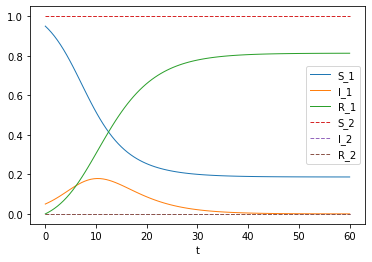

In [9]:
# p5e
p5efgh(0,0)

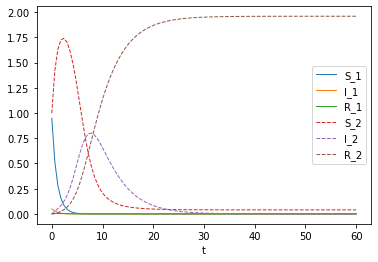

In [10]:
# p5f
p5efgh(1,0)

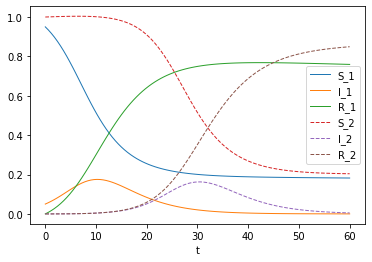

In [11]:
# p5g
p5efgh(0.001,0)

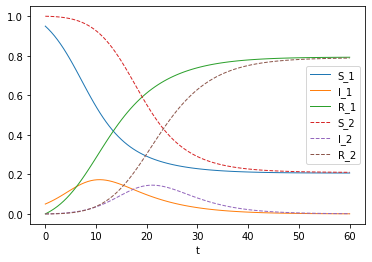

In [12]:
# p5h
p5efgh(0.01,0.01)

In [13]:
# p5i

def ab2(f, y0, y1, T, N):
    # f(t_n, y_n) -> y'_n
    # y0,y1 = Initial values
    # T = Final value of t, t varies from 0 to T inclusive
    # N = number of steps
    h = float(T)/N
    ts = np.linspace(0, T, N+1)

    out = np.empty(shape=(N+1,y0.shape[0]), dtype=float)
    out[0] = np.array(y0, dtype=float)
    out[1] = np.array(y1, dtype=float)

    for i in range(2,N+1):
        tm1 = ts[i-1]
        tm2 = ts[i-2]
        ym1 = out[i-1]
        ym2 = out[i-2]

        out[i] = ym1 + h*(1.5*f(tm1,ym1) - 0.5*f(tm2, ym2))

    return out

def p5i():
    y1 = y0
    N25 = ab2(f, y0, y1, T, 25)[25,:]
    N50 = ab2(f, y0, y1, T, 50)[50,:]
    N100 = ab2(f, y0, y1, T, 100)[100,:]

    for i, label in enumerate(['S_1','I_1','R_1','S_2','I_2','R_2']):
        print(f'Ratio for {label} = {(N50[i] - N25[i])/(N100[i] - N50[i])}')
        
p5i()

Ratio for S_1 = 3.741604528573353
Ratio for I_1 = 3.079225596030715
Ratio for R_1 = 3.6976867260384054
Ratio for S_2 = 3.6774667243122043
Ratio for I_2 = 3.0981893341155846
Ratio for R_2 = 3.6069051760976225
